# Выбор локации для скважины

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [77]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [78]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [79]:
data_1.duplicated().sum()

0

In [80]:
data_2.duplicated().sum()

0

In [81]:
data_3.duplicated().sum()

0

Пропусков и явных дубликотов не обнаружено

In [132]:
print('Район 1, корреляция объема запасов с признаком \'f0\':', data_1['f0'].corr(data_1['product']).round(2))
print('Район 1, корреляция объема запасов с признаком \'f1\':', data_1['f1'].corr(data_1['product']).round(2))
print('Район 1, корреляция объема запасов с признаком \'f2\':', data_1['f2'].corr(data_1['product']).round(2))
print('Район 2, корреляция объема запасов с признаком \'f0\':', data_2['f0'].corr(data_2['product']).round(2))
print('Район 2, корреляция объема запасов с признаком \'f1\':', data_2['f1'].corr(data_2['product']).round(2))
print('Район 2, корреляция объема запасов с признаком \'f2\':', data_2['f2'].corr(data_2['product']).round(8))
print('Район 3, корреляция объема запасов с признаком \'f0\':', data_3['f0'].corr(data_3['product']).round(2))
print('Район 3, корреляция объема запасов с признаком \'f1\':', data_3['f1'].corr(data_3['product']).round(2))
print('Район 3, корреляция объема запасов с признаком \'f2\':', data_3['f2'].corr(data_3['product']).round(2))

Район 1, корреляция объема запасов с признаком 'f0': 0.14
Район 1, корреляция объема запасов с признаком 'f1': -0.19
Район 1, корреляция объема запасов с признаком 'f2': 0.48
Район 2, корреляция объема запасов с признаком 'f0': -0.03
Район 2, корреляция объема запасов с признаком 'f1': -0.01
Район 2, корреляция объема запасов с признаком 'f2': 0.99939697
Район 3, корреляция объема запасов с признаком 'f0': -0.0
Район 3, корреляция объема запасов с признаком 'f1': -0.0
Район 3, корреляция объема запасов с признаком 'f2': 0.45


'f2' влияет на объем больше остальных признаков.

Для второго региона корелляция объема с 'f2' ~100%

In [83]:
features_1=data_1.drop(['product','id'], axis=1)
target_1=data_1['product']
features_2=data_2.drop(['product','id'], axis=1)
target_2=data_2['product']
features_3=data_3.drop(['product','id'], axis=1)
target_3=data_3['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=12345)

In [84]:
print(features_train_1.shape, features_valid_1.shape, target_train_1.shape, target_valid_1.shape)
print(features_train_2.shape, features_valid_2.shape, target_train_2.shape, target_valid_2.shape)
print(features_train_3.shape, features_valid_3.shape, target_train_3.shape, target_valid_3.shape)

(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)


Выборки разделены корректно

## Обучение и проверка модели

In [85]:
model_1 = LinearRegression()
model_1.fit(features_train_1,target_train_1)
predictions_1 = model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predictions_1, squared=False)
print('Cредний запас предсказанного сырья первого региона:', predictions_1.mean(),'RMSE :',rmse_1)

Cредний запас предсказанного сырья первого региона: 92.59256778438035 RMSE : 37.5794217150813


In [86]:
model_2 = LinearRegression()
model_2.fit(features_train_2,target_train_2)
predictions_2 = model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predictions_2, squared=False)
print('Cредний запас предсказанного сырья второго региона:', predictions_2.mean(),'RMSE :',rmse_2)

Cредний запас предсказанного сырья второго региона: 68.728546895446 RMSE : 0.893099286775617


In [87]:
model_3 = LinearRegression()
model_3.fit(features_train_3,target_train_3)
predictions_3 = model_3.predict(features_valid_3)
rmse_3 = mean_squared_error(target_valid_3, predictions_3, squared=False)
print('Cредний запас предсказанного сырья третьего региона:', predictions_3.mean(),'RMSE :',rmse_3)

Cредний запас предсказанного сырья третьего региона: 94.96504596800489 RMSE : 40.02970873393434


Первый и третий регион похожи по предсказаным значениям и RMSE, а второй имеет меньший показатель предсказанного сырья и подозрительно низкий RMSE

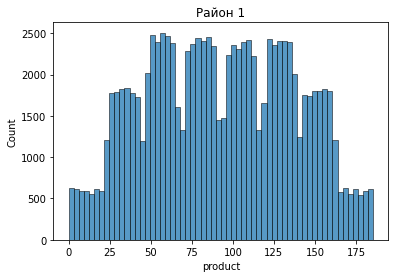

In [88]:
sns.histplot(data=data_1, x="product")
plt.title('Район 1');

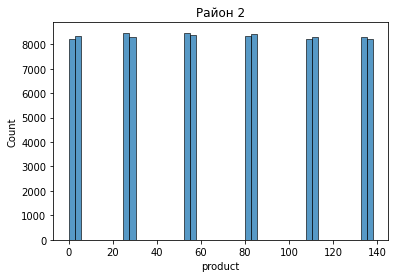

In [89]:
sns.histplot(data=data_2, x="product", bins=50)
plt.title('Район 2');

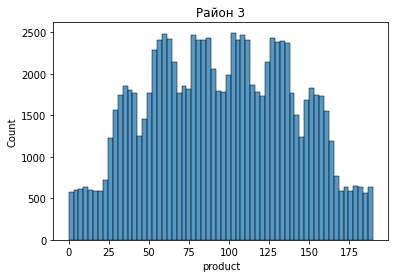

In [90]:
sns.histplot(data=data_3, x="product")
plt.title('Район 3');

In [91]:
data_2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

Всего 12 уникальных значений 'product' отсюда и низкий показатель ошибки

## Подготовка к расчёту прибыли

In [92]:
EXPLORING_POINTS = 500
MOST_VALUEBLE_POINTS = 200
BUDGET = 10_000_000_000
BARREL_UNIT_COST = 450_000
LOSS_PROB = 0.025

In [93]:
threshold = BUDGET/(BARREL_UNIT_COST*most_valueble_points)

In [94]:
threshold

111.11111111111111

Для безубыточной разработки новой скважины она должна производить не менее 111.11 тыс. баррелей сырья, что больше чем средний запас предсказанного сырья любого региона.

In [95]:
def revenue(target, predictions, count):
    predictions_sorted = pd.DataFrame()
    predictions_sorted['target'] = target
    predictions_sorted['predictions']=predictions
    predictions_sorted = predictions_sorted.sort_values(by='predictions', ascending=False)
    return predictions_sorted['target'][0:count].sum()*BARREL_UNIT_COST-BUDGET

In [96]:
pd.options.mode.chained_assignment = None
revenue(target_valid_1, predictions_1, MOST_VALUEBLE_POINTS)

3320826043.1398506

In [97]:
revenue(target_valid_2, predictions_2, MOST_VALUEBLE_POINTS)

2415086696.681511

In [98]:
revenue(target_valid_3, predictions_3, MOST_VALUEBLE_POINTS)

2710349963.5998325

## Расчёт прибыли и рисков 

In [128]:
state = np.random.RandomState(12345)
def bootstrap (target, predictions):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=EXPLORING_POINTS, replace=True, random_state=state)
        probs_subsample = pd.Series(predictions, index=(target.index))[target_subsample.index]
        
        values.append(revenue(target_subsample,probs_subsample,MOST_VALUEBLE_POINTS))

    values = pd.Series(values)
    loss =values.quantile(q=LOSS_PROB)
    mean = values.mean()
    
    risk=1
    for j in np.arange(0,0.5,0.005):
        if abs(values.quantile(q=j))==values.quantile(q=j) and risk>j:
            risk=j
            
    print("95%-ый доверительный интервал:", (loss/1_000_000).round(1),'млн.р.',(
        values.quantile(q=0.975)/1_000_000).round(1),'млн.р.')
    print("Средняя прибыль:", (mean/1_000_000).round(1),'млн.р.')
    print('Риск убытка',(risk*100).round(1),'%')

In [129]:
bootstrap(target_valid_1,predictions_1)

95%-ый доверительный интервал: -111.2 млн.р. 909.8 млн.р.
Средняя прибыль: 396.2 млн.р.
Риск убытка 7.0 %


In [130]:
bootstrap(target_valid_2,predictions_2)

95%-ый доверительный интервал: 78.1 млн.р. 863.0 млн.р.
Средняя прибыль: 461.2 млн.р.
Риск убытка 1.0 %


In [131]:
bootstrap(target_valid_3,predictions_3)

95%-ый доверительный интервал: -112.2 млн.р. 934.6 млн.р.
Средняя прибыль: 393.0 млн.р.
Риск убытка 6.5 %


Cогласно заданию после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5% 

Подходит только второй регион